# Dataset Used: Movielens

**Contains 3 csv files**  
**1. Movies- Contains movieID, title and genres**  
**2. Ratings- Contins userID, ratings for movies, movieID**  
**3. Movies metadata- Contains metadata information about movies such as overview, release date, genres, budget, vote average, vote count etc.**


In [2]:
import pandas as pd

netflix_movies_df=pd.read_csv('/kaggle/input/netflix-dataset/Movies_Dataset.csv')
netflix_rating_df=pd.read_csv('/kaggle/input/netflix-dataset/Ratings_Dataset.csv')
netflix_metadata_df=pd.read_csv('/kaggle/input/netflix-dataset/Metadata_Dataset.csv',usecols=['genres','id','overview','runtime','title','vote_average','vote_count','release_date'])

# EDA (EXPLORATORY DATA ANALYSIS)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Sample of 3 csv files in our dataset

In [5]:
netflix_movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
netflix_rating_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [7]:
netflix_metadata_df.head()

,genres,id,overview,release_date,runtime,title,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,81.0,Toy Story,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,1995-12-15,104.0,Jumanji,6.9,2413.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,1995-12-22,101.0,Grumpier Old Men,6.5,92.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,127.0,Waiting to Exhale,6.1,34.0
4,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,1995-02-10,106.0,Father of the Bride Part II,5.7,173.0


In [8]:
summary = netflix_metadata_df.describe()
summary.style.format("{:.2f}")

,runtime,vote_average,vote_count
count,45203.00,45460.00,45460.00
mean,94.13,5.62,109.90
std,38.41,1.92,491.31
min,0.00,0.00,0.00
25%,85.00,5.00,3.00
50%,95.00,6.00,10.00
75%,107.00,6.80,34.00
max,1256.00,10.00,14075.00


In [9]:
df_movies_join = pd.merge(netflix_movies_df, netflix_rating_df, on='movieId', how = 'left')
df_movies_join.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,3.0,8.518667e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9.0,4.0,9.386292e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,5.0,1.331380e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.0,9.979383e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,8.551901e+08


In [10]:
#Identify the unique values
dict = {}
for i in list(df_movies_join.columns):
    dict[i] = df_movies_join[i].value_counts().shape[0]
print(pd.DataFrame(dict,index = ["Unique counts"]).transpose())

           Unique counts
movieId             9125
title               9123
genres               902
userId               671
rating                10
timestamp          78141


In [11]:
print(df_movies_join.dtypes)

movieId        int64
title         object
genres        object
userId       float64
rating       float64
timestamp    float64
dtype: object


In [12]:
print(df_movies_join.shape)

(100063, 6)


In [13]:
null_counts_joined = df_movies_join.isnull().sum()
print("The number of null values in the merged dataset is\n",null_counts_joined)

The number of null values in the merged dataset is
 movieId       0
title         0
genres        0
userId       59
rating       59
timestamp    59
dtype: int64


In [14]:
df_movies_join.fillna(0)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,3.0,8.518667e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9.0,4.0,9.386292e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,5.0,1.331380e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.0,9.979383e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,8.551901e+08
...,...,...,...,...,...,...
100058,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,611.0,3.0,1.471524e+09
100059,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,0.0,0.0,0.000000e+00
100060,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,547.0,5.0,1.476419e+09
100061,164977,The Gay Desperado (1936),Comedy,0.0,0.0,0.000000e+00


In [15]:
summary = df_movies_join.describe()

In [16]:
summary.style.format("{:.2f}")

,movieId,userId,rating,timestamp
count,100063.00,100004.00,100004.00,100004.00
mean,12591.44,347.01,3.54,1129639086.94
std,26456.70,195.16,1.06,191685826.03
min,1.00,1.00,0.50,789652009.00
25%,1029.00,182.00,3.00,965847824.00
50%,2407.00,367.00,4.00,1110421822.00
75%,5420.00,520.00,4.00,1296192495.50
max,164979.00,671.00,5.00,1476640644.00


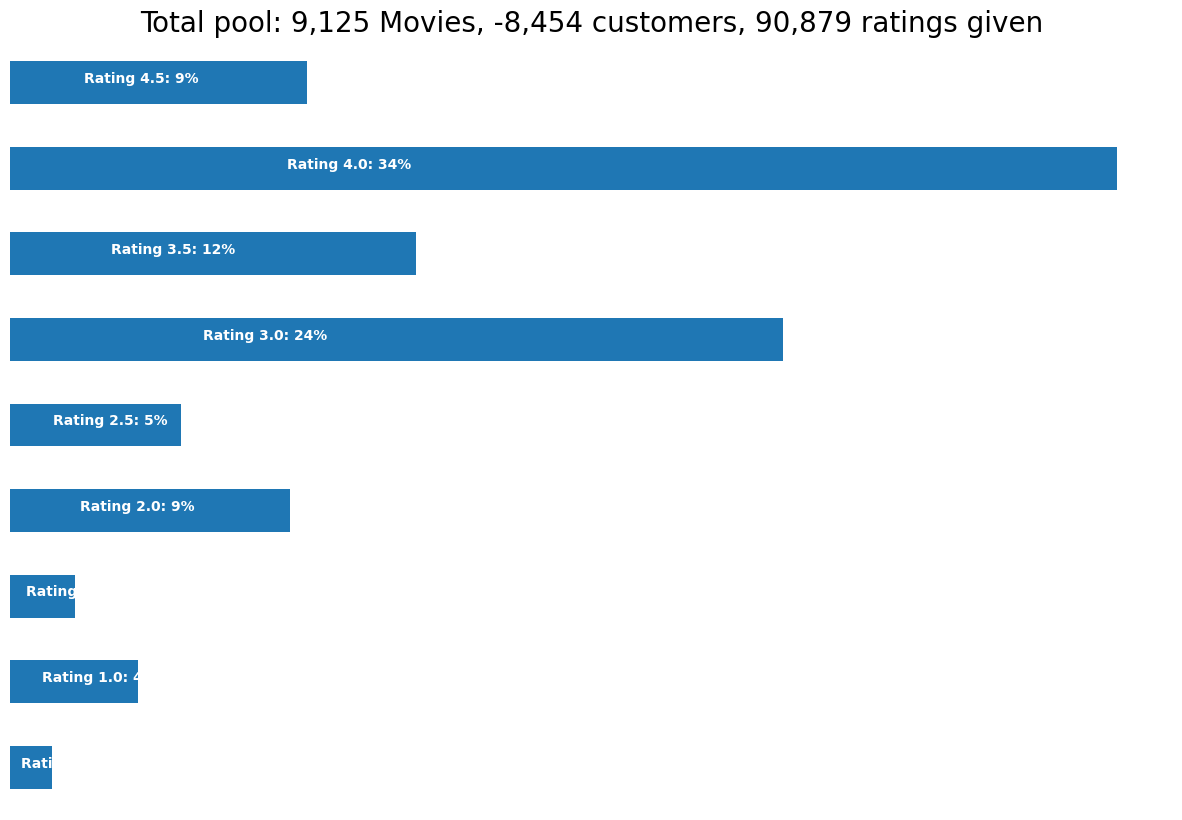

In [15]:
# group ratings by intervals of 0.5
p = df_movies_join.groupby(pd.cut(df_movies_join['rating'], np.arange(0.5, 5.1, 0.5), right=False))['rating'].agg(['count'])

# get movie count
movie_count = df_movies_join['movieId'].nunique()

# get customer count
cust_count = df_movies_join['userId'].nunique() - movie_count

# get rating count
rating_count = df_movies_join['userId'].count() - movie_count

# create horizontal bar plot
ax = p.plot(kind='barh', legend=False, figsize=(15,10))

# set title and axis off
plt.title('Total pool: {:,} Movies, {:,} customers, {:,} ratings given'.format(movie_count, cust_count, rating_count), fontsize=20)
plt.axis('off')

# add text labels to the plot
for i in range(len(p)):
    ax.text(p.iloc[i][0]/4, i, 'Rating {}: {:.0f}%'.format(p.index[i].left, p.iloc[i][0]*100 / p.sum()[0]), color='white', weight='bold')

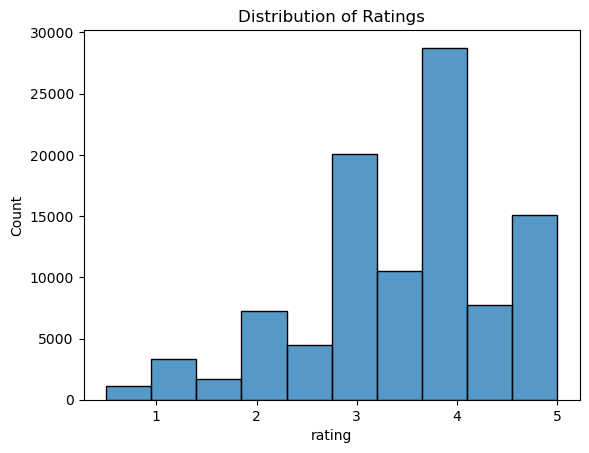

In [16]:
sns.histplot(data=df_movies_join, x='rating', bins=10)
plt.title('Distribution of Ratings')
plt.show()

## Distribution of users rating

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


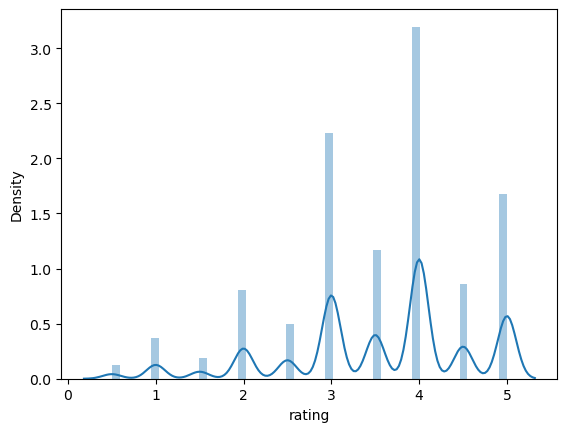

In [17]:
sns.distplot(df_movies_join["rating"]);

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  after removing the cwd from sys.path.


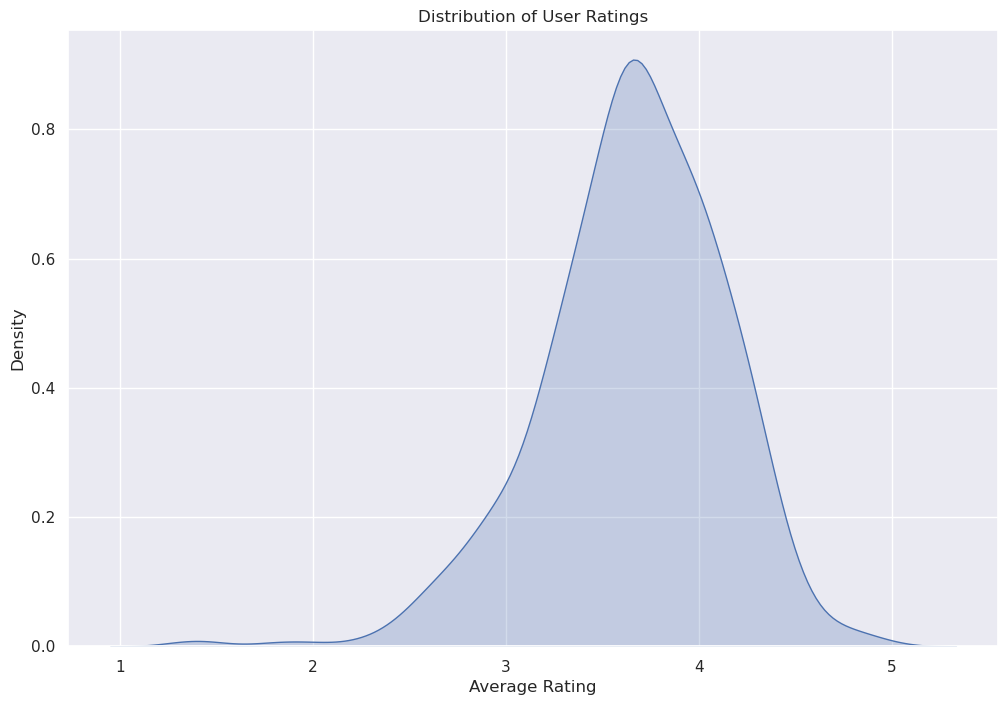

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
user_ratings = df_movies_join.groupby('userId')['rating'].mean()
ax = sns.kdeplot(data=user_ratings, shade=True)
ax.set(xlabel='Average Rating', ylabel='Density', title='Distribution of User Ratings')
plt.show()


### Average Rating of each Genre

In [25]:
df_movies_split = df_movies_join.assign(genres=df_movies_join['genres'].replace('\|', ' ', regex=True)).explode('genres')


In [26]:
genre_ratings = df_movies_join.assign(genres=df_movies_join['genres'].str.split('|')).explode('genres').groupby('genres')['rating'].mean().sort_values(ascending=False)
print(genre_ratings)


genres
Film-Noir             3.955702
War                   3.817214
Documentary           3.813299
(no genres listed)    3.777778
Drama                 3.681780
Crime                 3.679639
Mystery               3.679541
Animation             3.636062
Musical               3.598793
IMAX                  3.571134
Western               3.566423
Romance               3.556165
Adventure             3.520393
Thriller              3.518502
Fantasy               3.518063
Children              3.466187
Sci-Fi                3.460430
Comedy                3.446037
Action                3.445613
Horror                3.315243
Name: rating, dtype: float64


  We can see that the genre "Film-Noir" has the highest average rating of 3.955

### Correlation between genre and rating

In [17]:
# One-hot encode the genres column
genres = pd.get_dummies(df_movies_join['genres'])

# Concatenate the one-hot encoded genres with the original dataframe
df_encoded = pd.concat([df_movies_join, genres], axis=1)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Extract the correlation values between genres and rating
genre_rating_corr = corr_matrix.loc['rating', genres.columns]

# Print the correlation values
print(genre_rating_corr)


(no genres listed)                     0.002970
Action                                -0.023694
Action|Adventure                       0.017081
Action|Adventure|Animation             0.006231
Action|Adventure|Animation|Children    0.000267
                                         ...   
Sci-Fi|Thriller                       -0.016283
Sci-Fi|Thriller|IMAX                  -0.000369
Thriller                              -0.003940
War                                    0.003675
Western                                0.002236
Name: rating, Length: 902, dtype: float64


### Top 5 popular movies over the years

In [94]:
# Convert release_date column to datetime format
netflix_metadata_df['release_date'] = pd.to_datetime(netflix_metadata_df['release_date'], errors='coerce')

# Get the top 5 movies for each year based on rating
top_movies = netflix_metadata_df.groupby(netflix_metadata_df['release_date'].dt.year).apply(lambda x: x.nlargest(5, 'vote_count')).reset_index(drop=True)
top_movies


,genres,id,overview,release_date,runtime,title,vote_average,vote_count
0,"[{'id': 99, 'name': 'Documentary'}]",315946,Photo sequence of the rare transit of Venus ov...,1874-12-09,1.0,Passage of Venus,6.0,19.0
1,"[{'id': 99, 'name': 'Documentary'}]",194079,Sallie Gardner at a Gallop was one of the earl...,1878-06-14,1.0,Sallie Gardner at a Gallop,6.2,25.0
2,"[{'id': 99, 'name': 'Documentary'}]",426903,Individual photographs of the running of a buf...,1883-11-19,1.0,Buffalo Running,5.4,7.0
3,"[{'id': 99, 'name': 'Documentary'}]",159897,The last remaining production of Le Prince's L...,1887-08-18,1.0,Man Walking Around a Corner,4.1,17.0
4,"[{'id': 99, 'name': 'Documentary'}]",16464,"A film by Louis Aimé Augustin Le Prince, shot ...",1888-10-15,1.0,Traffic Crossing Leeds Bridge,5.9,25.0
...,...,...,...,...,...,...,...,...
638,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",332283,The love affair between poet Percy Shelley and...,2018-04-25,0.0,Mary Shelley,0.0,1.0
639,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",299782,"Orson Welles' unfinished masterpiece, restored...",2018-12-31,0.0,The Other Side of the Wind,0.0,1.0
640,"[{'id': 18, 'name': 'Drama'}]",412059,"In forgotten towns along the American border, ...",2018-04-04,105.0,Mobile Homes,0.0,1.0
641,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",302349,"Twenty years after the events of Iron Sky, the...",2018-03-01,0.0,Iron Sky: The Coming Race,0.0,0.0


## Most popular genres of movie released

<BarContainer object of 19 artists>

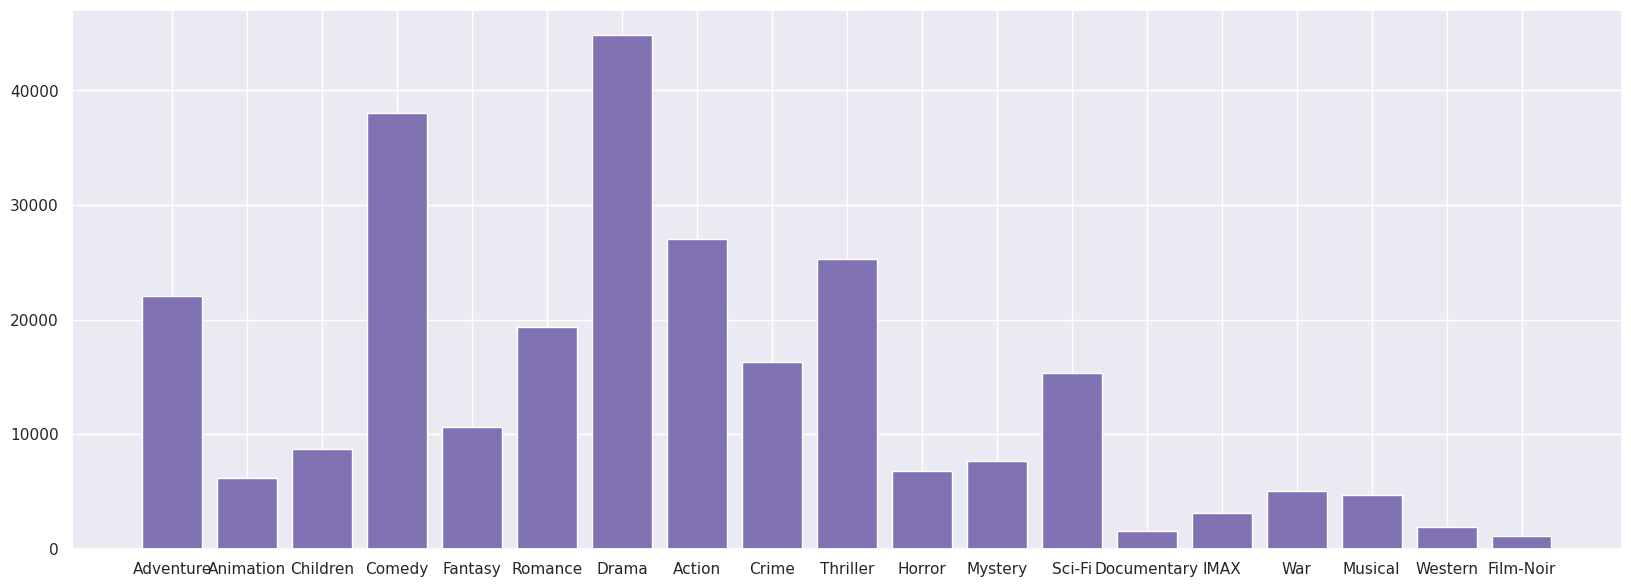

In [96]:
plt.figure(figsize=(20,7))
generlist = df_movies_join['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='m')

In [97]:
print("Shape of frames: \n"+ " Rating DataFrame"+ str(netflix_rating_df.shape)+"\n Movies DataFrame"+ str(netflix_movies_df.shape))


Shape of frames: 
 Rating DataFrame(100004, 4)
 Movies DataFrame(9125, 3)


## Grouping the rating based on user

In [98]:
ratings_grouped_by_users = df_movies_join.groupby('userId').agg([np.size, np.mean])
ratings_grouped_by_users.head(5)



movieId              rating           timestamp  \
          size         mean   size      mean      size   
userId                                                   
1.0         20  1675.600000     20  2.550000        20   
2.0         76   354.828947     76  3.486842        76   
3.0         51  8207.901961     51  3.568627        51   
4.0        204  1721.514706    204  4.348039       204   
5.0        100  6655.940000    100  3.910000       100   

                                     year          
                                mean size    mean  
userId                                             
1.0    2009-12-14 02:52:41.750000128   20  2009.0  
2.0    1996-06-21 11:15:17.776315776   76  1996.0  
3.0    2011-02-28 10:48:57.058823424   51  2011.0  
4.0    2000-02-06 23:43:11.117647104  204  2000.0  
5.0    2006-11-12 23:28:14.169999872  100  2006.0

## Top 10 users who have rated most of the movies

<AxesSubplot:xlabel='userId'>

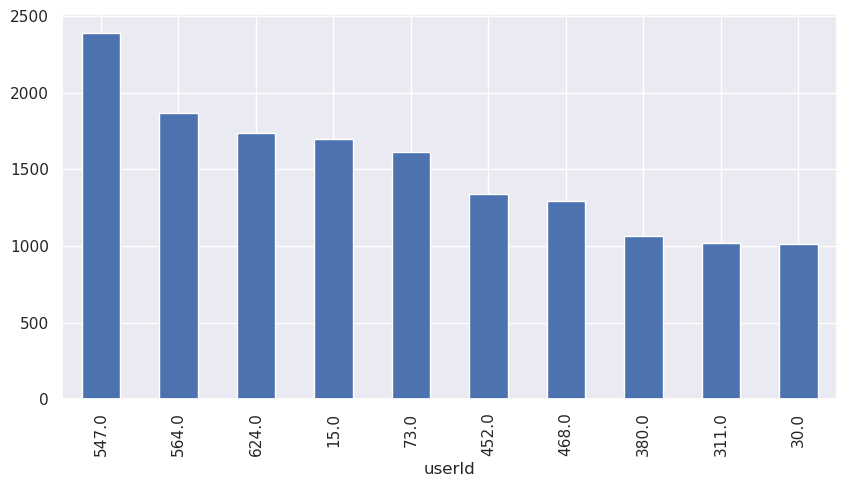

In [99]:
ratings_grouped_by_users = ratings_grouped_by_users.drop('movieId', axis = 1)
ratings_grouped_by_users['rating']['size'].sort_values(ascending=False).head(10).plot(kind='bar', figsize = (10,5))



In [100]:
ratings_grouped_by_movies = df_movies_join.groupby('movieId').agg([np.mean], np.size)
ratings_grouped_by_movies.head()



,userId,rating,timestamp,year
,mean,mean,mean,mean
movieId,,,,
1,338.558704,3.872470,2004-12-15 13:11:11.975708544,2004.457490
2,318.906542,3.401869,2003-11-20 09:32:12.093458048,2003.336449
3,374.423729,3.161017,2000-08-14 08:48:17.949152512,2000.203390
4,355.538462,2.384615,1999-05-27 04:34:30.923076864,1998.769231
5,320.785714,3.267857,2001-08-02 02:41:29.482142848,2001.125000


## Movies with high average rating


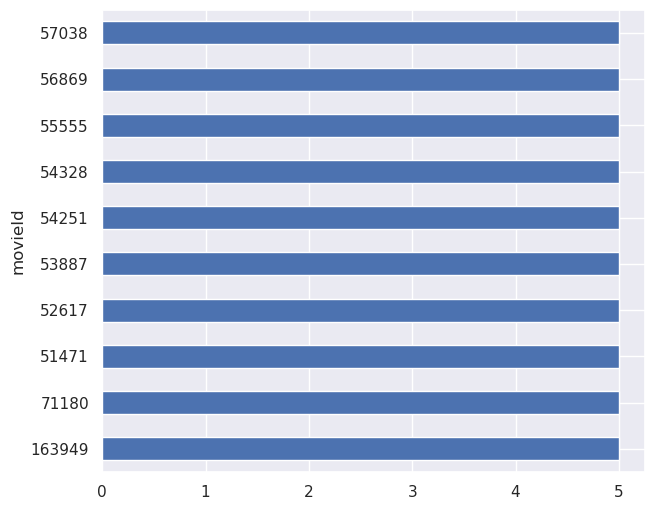

In [101]:
ratings_grouped_by_movies['rating']['mean'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(7,6));


## Movies with low average rating


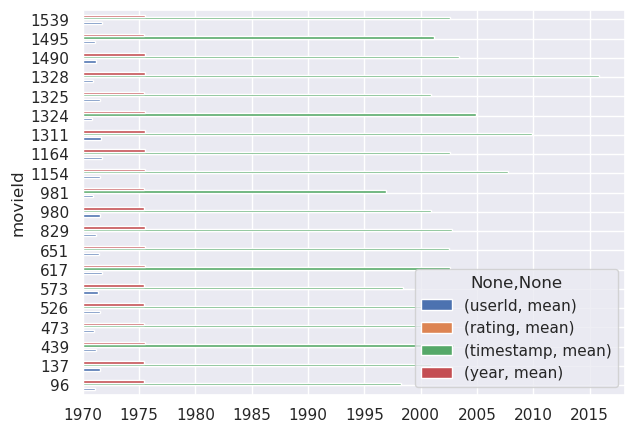

In [102]:
low_rated_movies_filter = ratings_grouped_by_movies['rating']['mean']< 1.5
low_rated_movies = ratings_grouped_by_movies[low_rated_movies_filter]
low_rated_movies.head(20).plot(kind='barh', figsize=(7,5));



In [103]:
low_rated_movies.head(10)

,userId,rating,timestamp,year
,mean,mean,mean,mean
movieId,,,,
96,391.000000,1.0,1998-04-02 16:02:16.000000000,1998.000000
137,564.000000,1.0,2000-11-21 21:00:24.000000000,2000.000000
439,414.000000,1.0,2002-12-08 23:34:34.000000000,2002.000000
473,360.333333,1.0,2000-07-31 01:41:28.000000000,2000.000000
526,564.000000,1.0,2000-11-21 21:48:40.000000000,2000.000000
573,492.000000,1.0,1998-06-17 19:18:19.000000000,1998.000000
617,609.000000,1.0,2002-08-20 19:01:59.000000000,2002.000000
651,525.000000,1.0,2002-06-24 14:22:24.000000000,2002.000000


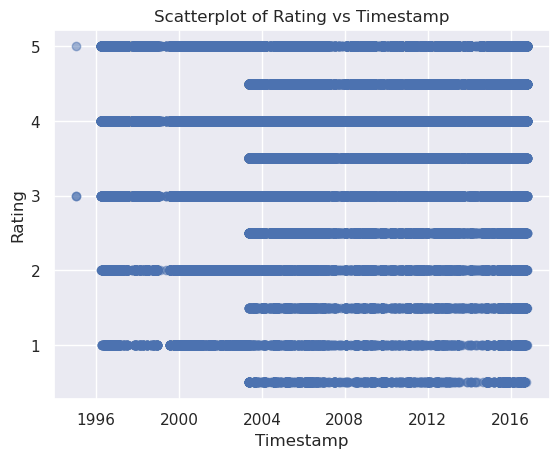

In [104]:
# scatterplot of rating vs timestamp
plt.scatter(df_movies_join['timestamp'], df_movies_join['rating'], alpha=0.5)
plt.title('Scatterplot of Rating vs Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Rating')
plt.show()

## List of Genres

In [105]:
unique_genres = set()

for genres in netflix_metadata_df['genres']:
    genres_list = eval(genres)
    for genre_dict in genres_list:
        unique_genres.add(genre_dict['name'])

# Print unique genres
print(unique_genres)

{'Romance', 'Fantasy', 'GoHands', 'Adventure', 'Rogue State', 'Comedy', 'BROSTA TV', 'Western', 'Telescene Film Group Productions', 'Mystery', 'The Cartel', 'Horror', 'Pulser Productions', 'Mardock Scramble Production Committee', 'Science Fiction', 'Animation', 'Documentary', 'Thriller', 'Odyssey Media', 'Action', 'Drama', 'War', 'Carousel Productions', 'Aniplex', 'Sentai Filmworks', 'History', 'Family', 'Foreign', 'Vision View Entertainment', 'TV Movie', 'Crime', 'Music'}


## Lowest Runtime

In [106]:
# Filter out zero values from runtime column
filtered_data = netflix_metadata_df[netflix_metadata_df['runtime'] != 0]

# Find movie with lowest runtime
min_runtime = filtered_data['runtime'].min()
min_runtime_movies = filtered_data[filtered_data['runtime'] == min_runtime]

# Print all movies with the same minimum runtime
for index, movie in min_runtime_movies.iterrows():
    print(movie['title'], movie['runtime'])

The Four Troublesome Heads 1.0
The Human Pyramid 1.0
Meat Love 1.0
Edison Kinetoscopic Record of a Sneeze 1.0
Ella Lola, a la Trilby 1.0
Turkish Dance, Ella Lola 1.0
Boys Diving, Honolulu 1.0
Dickson Experimental Sound Film 1.0
Blacksmith Scene 1.0
The Kiss 1.0
The Arrival of a Train at La Ciotat 1.0
Tables Turned on the Gardener 1.0
The Kiss 1.0
Workers Leaving the Lumière Factory 1.0
Santa Claus 1.0
The 3 Rs 1.0
Stille Nacht I 1.0
Old Man Drinking a Glass of Beer 1.0
Dickson Greeting 1.0
The Merry Skeleton 1.0
Serpentine Dance: Loïe Fuller 1.0
Arab Cortege, Geneva 1.0
My Grandpa the Bankrobber 1.0
Man Walking Around a Corner 1.0
Accordion Player 1.0
Monkeyshines, No. 1 1.0
Monkeyshines, No. 2 1.0
Sallie Gardner at a Gallop 1.0
Traffic Crossing Leeds Bridge 1.0
London's Trafalgar Square 1.0
Passage of Venus 1.0
Newark Athlete 1.0
Men Boxing 1.0
La Vague 1.0
A Hand Shake 1.0
Fencing 1.0
Panorama of Eiffel Tower 1.0
Eiffel Tower from Trocadero Palace 1.0
Palace of Electricity 1.0
Champs

## Highest Runtime

In [107]:
filtered_data = netflix_metadata_df[netflix_metadata_df['runtime'] != 0]

# Find movie(s) with highest runtime
max_runtime = filtered_data['runtime'].max()
max_runtime_movies = filtered_data[filtered_data['runtime'] == max_runtime]

# Print all movies with the same maximum runtime
for index, movie in max_runtime_movies.iterrows():
    print(movie['title'], movie['runtime'])

Centennial 1256.0


## Oldest and Latest Year A Movie was made in

In [108]:
# Print the earliest and latest release years in netflix_metadata_df
print("Earliest release year:", netflix_metadata_df['release_date'].dt.year.min())
print("Latest release year:", netflix_metadata_df['release_date'].dt.year.max())


Earliest release year: 1874.0
Latest release year: 2020.0


In [109]:
#netflix_movies_df
print(f"\n\n{netflix_movies_df.head()}")

#netflix_rating_df
print(f"\n\n{netflix_rating_df.head()}")

# movie_id_to_title = dict(zip(netflix_movies_df['movieId'], netflix_movies_df['title']))
# movie_id_to_title=dict(netflix_movies_df[['movieId', 'title']].values)
movieID_to_title = netflix_movies_df.set_index('movieId')['title'].to_dict()




   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


In [110]:
#merging both the movies and ratings dataset
recommendation_df = pd.merge(netflix_movies_df, netflix_rating_df, on='movieId')
recommendation_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091
...,...,...,...,...,...,...
99999,161944,The Last Brickmaker in America (2001),Drama,287,5.0,1470167824
100000,162376,Stranger Things,Drama,73,4.5,1474255532
100001,162542,Rustom (2016),Romance|Thriller,611,5.0,1471520667
100002,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,611,3.0,1471523986


# Recommendation Models

# Collaborative Filtering Recommendation
     1. Memory Based Collaborative Filtering
         a. Item Based Collaboratove Filtering
         b. User Based Collaborative Filtering
     2. Model Based Collaborative Filtering

## 1. Memory Based Collaborative Filtering
## a. Item Based Collaborative Filtering

In [111]:
user_item_ratings_matrix=recommendation_df.pivot_table(index=['movieId'],columns=['userId'],values='rating')
# Replacing the NaN values with 0.  
# 0 indicates that the user has not watched/rated that movie
user_item_ratings_matrix.fillna( 0, inplace = True )
user_item_ratings_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Movie-Movie Similarity Matrix (Cosine Similarity)

In [112]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

similarity_matrix = cosine_similarity(user_item_ratings_matrix)
np.fill_diagonal( similarity_matrix, 0 ) 
similarity_matrix = pd.DataFrame(similarity_matrix)
similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,9056,9057,9058,9059,9060,9061,9062,9063,9064,9065
0,0.000000,0.394511,0.306516,0.133614,0.245102,0.377086,0.278629,0.063031,0.117499,0.310689,...,0.055829,0.031902,0.079755,0.079755,0.079755,0.079755,0.079755,0.0,0.0,0.055829
1,0.394511,0.000000,0.217492,0.164651,0.278476,0.222003,0.207299,0.223524,0.113669,0.418124,...,0.000000,0.055038,0.068797,0.082557,0.082557,0.137594,0.068797,0.0,0.0,0.000000
2,0.306516,0.217492,0.000000,0.177012,0.370732,0.247499,0.435648,0.127574,0.306717,0.191255,...,0.000000,0.000000,0.000000,0.116226,0.116226,0.000000,0.000000,0.0,0.0,0.000000
3,0.133614,0.164651,0.177012,0.000000,0.179556,0.072518,0.184626,0.501513,0.254630,0.111447,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,0.245102,0.278476,0.370732,0.179556,0.000000,0.272645,0.388476,0.194113,0.367941,0.246846,...,0.000000,0.176845,0.000000,0.117897,0.117897,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9061,0.079755,0.137594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
9062,0.079755,0.068797,0.000000,0.000000,0.000000,0.111103,0.000000,0.000000,0.000000,0.076835,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
9063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000
9064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000


### 1. Recommending movies based on a single most rated movie of a user

In [113]:
#recommeneds the movies based a user's top most rated movie
def item_based_cf(user_id):

    #to find users top movies
    user_movies=recommendation_df[recommendation_df.userId == user_id]#all the movies the user has rated
    mean_rating = user_movies['rating'].mean() #mean rating of the user
    top_user_movies=user_movies[user_movies.rating>mean_rating] #returning movies whose rating is greater than mean rating
    topmost_user_movie=top_user_movies.iloc[0,0]
    print("Users top rated Movies \n: ",top_user_movies)

    #to retrurn top most similar movies
    top_movie_similarity_df=netflix_movies_df.loc[:, ['movieId', 'title']]
    movie_index=netflix_movies_df.loc[netflix_movies_df['movieId'] == topmost_user_movie].index[0]
    top_movie_similarity_df["similarity_score"]=similarity_matrix[movie_index]
    sorted_top_most_movies = top_movie_similarity_df.sort_values('similarity_score', ascending=False)
    sorted_top_most_movies

    #from the topmost similar movies, return only those movies the user has not seen
    movieId_seen_by_user=user_movies['movieId'].tolist()
    movieId_recommended_to_user_sorted=sorted_top_most_movies['movieId'].tolist()
    movieId_recommended_to_user_sorted

    #only recommend movies that the user has not seen/rated in the past
    recommended_movieId_sorted=[]     #contains recommended movies the user has not seen in the past in a sorted order
    for i in movieId_recommended_to_user_sorted:
        if i not in movieId_seen_by_user:
            recommended_movieId_sorted.append(i)
   
    #return the recommended movies dataframe
    result=pd.DataFrame()
    recommended_movies=[]
    for movie_id in recommended_movieId_sorted:
        recommended_movies.append(movieID_to_title[movie_id])
    result['Movie ID']=recommended_movieId_sorted
    result['Title']=recommended_movies
    
    return result    #returns the list of all unseen movies arranged according to decreasing order of relevance
recommended_movies=item_based_cf(50)
recommended_movies

Users top rated Movies 
:         movieId                                 title  \
672         10                      GoldenEye (1995)   
3816       110                     Braveheart (1995)   
5091       161                   Crimson Tide (1995)   
5300       165     Die Hard: With a Vengeance (1995)   
8432       292                       Outbreak (1995)   
8701       296                   Pulp Fiction (1994)   
10262      339        While You Were Sleeping (1995)   
11040      356                   Forrest Gump (1994)   
11363      357    Four Weddings and a Funeral (1994)   
11789      367                      Mask, The (1994)   
11937      368                       Maverick (1994)   
13372      440                           Dave (1993)   
14372      480                  Jurassic Park (1993)   
15645      527               Schindler's List (1993)   
17396      589     Terminator 2: Judgment Day (1991)   
20940      780  Independence Day (a.k.a. ID4) (1996)   

                    

,Movie ID,Title
0,153,Batman Forever (1995)
1,592,Batman (1989)
2,588,Aladdin (1992)
3,329,Star Trek: Generations (1994)
4,500,Mrs. Doubtfire (1993)
...,...,...
9074,162672,Mohenjo Daro (2016)
9075,163056,Shin Godzilla (2016)
9076,163949,The Beatles: Eight Days a Week - The Touring Y...
9077,164977,The Gay Desperado (1936)


### 2. Recommending movies based on multiple topmost rated movies of a user

In [114]:
#extention of item_based_cf : Here we consider multiple top rated movies for a given user instead of just a single movie
def item_based_cf_top3(user_id):

    #to find users top movies
    user_movies=recommendation_df[recommendation_df.userId == user_id]#all the movies the user has rated
    mean_rating = user_movies['rating'].mean() #mean rating of the user
    top_user_movies=user_movies[user_movies.rating>mean_rating] #returning movies whose rating is greater than mean rating


    recommended_movies_wrt_all={} #dict od dict when main key is movie_of of top3 movies, value is another dict wherein key is movie id and value is sim score of this movieid wrt key movieid
    movieid_similarity_sum={}      #key is movie id, value is sum of sim scores of that movie id in all 3 dictionaries
    combined_recommended_movies=pd.DataFrame(columns =['Movie ID','Title'])
    
    top_rated_movies=[movieID_to_title[x] for x in top_user_movies.iloc[:,0]][:3]
    print(f"Top 3 highest rated movies by User \n: {top_rated_movies}")
        
    for topmost_user_movie in top_user_movies.iloc[:,0].tolist()[:3]: #following the same process but for top 3 movies not just top 1 movie
        #to retrurn top most similar movies
        top_movie_similarity_df=netflix_movies_df.loc[:, ['movieId', 'title']]
        movie_index=netflix_movies_df.loc[netflix_movies_df['movieId'] == topmost_user_movie].index[0]
        top_movie_similarity_df["similarity_score"]=similarity_matrix[movie_index]
        sorted_top_most_movies = top_movie_similarity_df.sort_values('similarity_score', ascending=False)
        

        #from the topmost similar movies, return only those movies the user has not seen
        movieId_seen_by_user=user_movies['movieId'].tolist()
        movieId_recommended_to_user_sorted=sorted_top_most_movies['movieId'].tolist()
        movieId_recommended_to_user_sorted

        recommended_movieId_sorted=[]
        
        count=0
        for i in movieId_recommended_to_user_sorted:
            if i not in movieId_seen_by_user and count<10:
                recommended_movieId_sorted.append(i)
                count+=1

        #return the recommended movies dataframe
        result=pd.DataFrame()
        recommended_movies=[]
        recommended_movies_avg_ratings=[]
        recommended_movies_similarity_score=[]
        
        #to find avg rating, sim score for recommended_movie and populating the dataframe to print
        for recommended_movie_id in recommended_movieId_sorted:
            recommended_movies.append(movieID_to_title[recommended_movie_id])
            avg_rating = netflix_rating_df[netflix_rating_df['movieId'] == recommended_movie_id]['rating'].mean()
            recommended_movies_avg_ratings.append(avg_rating)
            recommended_movie_id_index=netflix_movies_df.loc[netflix_movies_df['movieId'] == recommended_movie_id].index[0]
            recommended_movies_similarity_score.append(similarity_matrix[movie_index][recommended_movie_id_index])
            if recommended_movie_id in movieid_similarity_sum.keys():
                movieid_similarity_sum[recommended_movie_id]+=similarity_matrix[movie_index][recommended_movie_id_index]
            else:
                movieid_similarity_sum[recommended_movie_id]=similarity_matrix[movie_index][recommended_movie_id_index]
        
        result['Movie ID']=recommended_movieId_sorted
        result['Title']=recommended_movies
        result['Avg Rating']=recommended_movies_avg_ratings
        result["Similarity"]=recommended_movies_similarity_score
        result=result.set_index('Movie ID')
        recommended_movies_wrt_all[topmost_user_movie] = {k: v for k, v in zip(recommended_movieId_sorted, recommended_movies_similarity_score)}
        movieid_similarity_sum = {k: v for k, v in sorted(movieid_similarity_sum.items(), key=lambda x: x[1], reverse=True)}
        print(f"\nRecommendations made for movie {movieID_to_title[topmost_user_movie]} for user {user_id} \n\n {result}\n\n")    #returns the list of all unseen movies arranged according to decreasing order of relevance
    for k,v in movieid_similarity_sum.items():#converting movieid_similarity_sum dict to a dataframe 
        row = {'Movie ID': k, 'Title': movieID_to_title[k]}
        combined_recommended_movies = combined_recommended_movies.append(row, ignore_index=True)
    combined_recommended_movies=combined_recommended_movies.set_index('Movie ID')
    return combined_recommended_movies

user_id=10
item_based_recommendations=item_based_cf_top3(user_id)
print(f"Final Recommendation for user {user_id}: \n\n {item_based_recommendations}")

Top 3 highest rated movies by User 
: ['Usual Suspects, The (1995)', 'Addiction, The (1995)', 'Shawshank Redemption, The (1994)']

Recommendations made for movie Usual Suspects, The (1995) for user 10 

                                      Title  Avg Rating  Similarity
Movie ID                                                          
296                    Pulp Fiction (1994)    4.256173    0.644563
47             Seven (a.k.a. Se7en) (1995)    4.034826    0.597163
593       Silence of the Lambs, The (1991)    4.138158    0.562434
1213                     Goodfellas (1990)    4.202290    0.543383
608                           Fargo (1996)    4.256696    0.542078
527                Schindler's List (1993)    4.303279    0.536322
858                  Godfather, The (1972)    4.487500    0.530727
1617              L.A. Confidential (1997)    4.120000    0.529784
457                   Fugitive, The (1993)    3.953052    0.528569
2858                American Beauty (1999)    4.236364    0

# b. User Based Collaborative Filtering

### User-User Similarity Matrix (Cosine Similarity)

In [115]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

user_user_similarity_matrix = cosine_similarity(user_item_ratings_matrix.T)
np.fill_diagonal( user_user_similarity_matrix, 0 ) 
user_user_similarity_matrix = pd.DataFrame(user_user_similarity_matrix)
user_user_similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,661,662,663,664,665,666,667,668,669,670
0,0.000000,0.000000,0.000000,0.074482,0.016818,0.000000,0.083884,0.000000,0.012843,0.000000,...,0.000000,0.000000,0.014474,0.043719,0.000000,0.000000,0.000000,0.062917,0.000000,0.017466
1,0.000000,0.000000,0.124295,0.118821,0.103646,0.000000,0.212985,0.113190,0.113333,0.043213,...,0.477306,0.063202,0.077745,0.164162,0.466281,0.425462,0.084646,0.024140,0.170595,0.113175
2,0.000000,0.124295,0.000000,0.081640,0.151531,0.060691,0.154714,0.249781,0.134475,0.114672,...,0.161205,0.064198,0.176134,0.158357,0.177098,0.124562,0.124911,0.080984,0.136606,0.170193
3,0.074482,0.118821,0.081640,0.000000,0.130649,0.079648,0.319745,0.191013,0.030417,0.137186,...,0.114319,0.047228,0.136579,0.254030,0.121905,0.088735,0.068483,0.104309,0.054512,0.211609
4,0.016818,0.103646,0.151531,0.130649,0.000000,0.063796,0.095888,0.165712,0.086616,0.032370,...,0.191029,0.021142,0.146173,0.224245,0.139721,0.058252,0.042926,0.038358,0.062642,0.225086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.000000,0.425462,0.124562,0.088735,0.058252,0.000000,0.232051,0.069005,0.066412,0.032653,...,0.342283,0.050754,0.074080,0.124214,0.351207,0.000000,0.091597,0.018416,0.153111,0.127995
667,0.000000,0.084646,0.124911,0.068483,0.042926,0.019563,0.058773,0.112366,0.194493,0.098561,...,0.074089,0.059010,0.093021,0.082525,0.114487,0.091597,0.000000,0.000000,0.178017,0.135387
668,0.062917,0.024140,0.080984,0.104309,0.038358,0.024583,0.073151,0.055143,0.029291,0.060549,...,0.015960,0.025953,0.077927,0.101707,0.028773,0.018416,0.000000,0.000000,0.042609,0.085202
669,0.000000,0.170595,0.136606,0.054512,0.062642,0.019465,0.096240,0.247687,0.384429,0.158650,...,0.183662,0.122126,0.123407,0.143380,0.159479,0.153111,0.178017,0.042609,0.000000,0.228677


### 1. Finding the most similar user to a given user

In [116]:
similar_user_series= user_user_similarity_matrix.idxmax(axis=1)
df_similar_user= similar_user_series.to_frame()
df_similar_user.columns=['Most Similar User']
df_similar_user

,Most Similar User
0,324
1,337
2,378
3,517
4,312
...,...
666,384
667,453
668,625
669,8


In [117]:
def user_based_cf(userId):
    """
     Recommending movies which user hasn't watched as per User Similarity
    :param user_id: user_id to whom movie needs to be recommended
    :return: movieIds to user 
    """
    
    user_movies= netflix_rating_df[netflix_rating_df['userId']== userId]['movieId']
    sim_user=df_similar_user.iloc[0,0]
    print(sim_user)
    similar_user_movies=netflix_rating_df[netflix_rating_df['userId']== sim_user]['movieId']
    movie_recommendation_df=pd.DataFrame(columns=['movieId','title','genres','userId','rating','timestamp'])
    
    
    for movieId in similar_user_movies:#movies our user has not seen but seen by user's most similar user
        if movieId not in user_movies:
            #movies seen by simlar user and not current user
            df_new=recommendation_df[(recommendation_df.userId==sim_user) & (recommendation_df.movieId==movieId)]
            movie_recommendation_df=pd.concat([movie_recommendation_df,df_new])
        top_10=movie_recommendation_df.sort_values(['rating'], ascending = False )[1:10] #sort based on sim user's movie ratings
        top_10=top_10[['movieId','title']]
    result=pd.DataFrame(top_10)
    result=result.set_index('movieId')

    return result

user_id=1
recommend_movies= user_based_cf(user_id)
print(f"Recommended Movies for User ID : {user_id}\n")
print(recommend_movies)

324
Recommended Movies for User ID : 1

                                                     title
movieId                                                   
34                                             Babe (1995)
73                                  Misérables, Les (1995)
52435               How the Grinch Stole Christmas! (1966)
1197                            Princess Bride, The (1987)
3988     How the Grinch Stole Christmas (a.k.a. The Gri...
68099               Apollo 13: To the Edge and Back (1994)
6539     Pirates of the Caribbean: The Curse of the Bla...
77846                                  12 Angry Men (1997)
38499                             Angels in America (2003)


### 2. Finding K most similar users to a given user and predicting the ratings using KNN algorithm

In [118]:
#rows=users
#columns=movies
item_user_ratings_matrix=user_item_ratings_matrix.T
item_user_ratings_matrix.columns = range(item_user_ratings_matrix.shape[1])
item_user_ratings_matrix.reset_index(drop=True, inplace=True)
item_user_ratings_matrix


,0,1,2,3,4,5,6,7,8,9,...,9056,9057,9058,9059,9060,9061,9062,9063,9064,9065
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def user_based_using_KNN(user_id,k):
    # Create a k-NN model and fit the ratings data
    knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=k+1)
    knn.fit(item_user_ratings_matrix.values)

    user_ratings = item_user_ratings_matrix.loc[user_id, :].values.reshape(1, -1)#get ratings for the gievn userid to figure out which all movies movies user has rated or not
    
    # Find the k nearest neighbors for the given user using cosine similarity
    distances, indices = knn.kneighbors(user_ratings, n_neighbors=k+1)#indices contain the indices of k most similar users for the given user
    neighbor_indices = indices.squeeze()[1:]# The first index is the user itself, so exclude it since sim score is 1
    distances=distances.squeeze()[1:]
    nearest_user_ids=pd.DataFrame()
    nearest_user_ids['User ID']=[x+1 for x in neighbor_indices]
    nearest_user_ids['Similarity Score']=distances
    nearest_user_ids=nearest_user_ids.set_index('User ID')
    print(f"User ID and Similarity Scores of Similar Users : \n\n{nearest_user_ids}")

    
    # Predict the ratings for unseen movies
    seen_movies = item_user_ratings_matrix.columns[item_user_ratings_matrix.loc[user_id, :] !=0]
    unseen_movies = item_user_ratings_matrix.columns[item_user_ratings_matrix.loc[user_id, :] == 0]
    print(f"\nNumber of movies seen : {len(seen_movies)}\nNumber of movies not seen : {len(unseen_movies)}")

    neighbor_ratings = item_user_ratings_matrix.loc[neighbor_indices, unseen_movies]#subset of the matrix which contains ratings of unseen movies given my k most similar users
    predicted_ratings = neighbor_ratings.mean(axis=0) #taking the average of ratings for a movie seen by k most similar users
    
    # Print the predicted ratings for the unseen movies
    predicted_ratings_df=pd.DataFrame()
    predicted_ratings_df["Movie ID"]=netflix_movies_df['movieId'][unseen_movies].tolist()
    predicted_ratings_df["Title"]=netflix_movies_df['title'][unseen_movies].tolist()
    predicted_ratings_df["Predicted Ratings"]=predicted_ratings.tolist()

    #sort the predictions to present in descending order of ratings
    predicted_ratings_sorted = predicted_ratings_df.sort_values('Predicted Ratings', ascending=False)
    predicted_ratings_sorted=predicted_ratings_sorted.set_index('Movie ID')
    print(f"\nRecommendations for User Id : {user_id}\n")
    return predicted_ratings_sorted

user_id = 10
k=10
user_based_using_KNN(user_id,k)[:10]

User ID and Similarity Scores of Similar Users : 

         Similarity Score
User ID                  
438              0.782276
138              0.788319
454              0.843980
199              0.850247
275              0.851513
522              0.860412
501              0.864445
72               0.866192
563              0.866891
273              0.870971

Number of movies seen : 38
Number of movies not seen : 9028

Recommendations for User Id : 10



,Title,Predicted Ratings
Movie ID,,
2959,Fight Club (1999),4.05
2571,"Matrix, The (1999)",3.85
58047,"Definitely, Maybe (2008)",3.80
858,"Godfather, The (1972)",3.15
356,Forrest Gump (1994),3.05
67193,Duplicity (2009),3.00
98458,Baby Take a Bow (1934),2.90
1213,Goodfellas (1990),2.85
79588,Charlie St. Cloud (2010),2.80


## Model Evaluation for Memory Based CF

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(netflix_rating_df, test_size = 0.30, random_state = 42)

user_data = X_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)

dummy_train = X_train.copy()
dummy_test = X_test.copy()

dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x > 0 else 0)

dummy_train = dummy_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(1)
dummy_test = dummy_test.pivot(index ='userId', columns = 'movieId', values = 'rating').fillna(0)

### Model Evaluation for User-Based

In [121]:
test_user_features = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0

user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
test_user_final_rating = np.multiply(user_predicted_ratings_test, dummy_test)

from sklearn.preprocessing import MinMaxScaler
X = test_user_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies
scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)
# print(pred)

# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

30002

In [122]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,157296,157667,159462,160271,160440,160563,160567,160590,162376,162672
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
# RMSE Score
diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values
rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print("RMSE : ",rmse)

# Mean abslute error
mae = np.abs(pred - test).sum().sum()/total_non_nan
print("MAE : ",mae)

RMSE :  1.5581357014948647
MAE :  1.1947405439554972


### Model Evaluation for Item-Based

In [124]:
test_item_features = X_test.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
test_item_similarity = cosine_similarity(test_item_features)
test_item_similarity[np.isnan(test_item_similarity)] = 0 

item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity )

test_item_final_rating = np.multiply(item_predicted_ratings_test, dummy_test)

from sklearn.preprocessing import MinMaxScaler
X = test_item_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies
scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)
# print(pred)

# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,157296,157667,159462,160271,160440,160563,160567,160590,162376,162672
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# RMSE Score
diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values
rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print("RMSE : ",rmse)

# Mean abslute error
mae = np.abs(pred - test).sum().sum()/total_non_nan
print("MAE : ",mae)

RMSE :  2.5271010985132345
MAE :  2.2282980637061653


# Model Based Collaborative filtering using SVD

## Calculating sparsity in the matrix

In [126]:
sparsity = round(1.0 - len(netflix_rating_df) / float(item_user_ratings_matrix.shape[1] * item_user_ratings_matrix.shape[0]), 3)
print('The sparsity level of Netflix dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of Netflix dataset is 98.4%


In [127]:
# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

reader = Reader()
svd=SVD()


In [128]:
def svd_model_based_recommednation(user_id):
    data = Dataset.load_from_df(netflix_rating_df[['userId', 'movieId', 'rating']], reader)
    trainset = data.build_full_trainset()
    svd.fit(trainset)

    svd_recommended_movies=netflix_movies_df.copy()
    svd_recommended_movies['Predicted Ratings'] = svd_recommended_movies['movieId'].apply(lambda x: svd.predict(user_id, x).est)

    svd_recommended_movies = svd_recommended_movies.drop('movieId', axis = 1)

    svd_recommended_movies = svd_recommended_movies.sort_values('Predicted Ratings', ascending=False)
    return svd_recommended_movies
    
user_id=50
svd_model_based_recommednation(user_id)

,title,genres,Predicted Ratings
2764,Modern Times (1936),Comedy|Drama|Romance,4.436332
746,All About Eve (1950),Drama,4.298566
743,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,4.231258
858,Swingers (1996),Comedy|Drama,4.230513
1624,Roger & Me (1989),Documentary,4.222433
...,...,...,...
1892,Police Academy 5: Assignment: Miami Beach (1988),Comedy|Crime,2.066436
1208,Anaconda (1997),Action|Adventure|Thriller,2.057647
489,Super Mario Bros. (1993),Action|Adventure|Children|Comedy|Fantasy|Sci-Fi,1.904585
2869,Battlefield Earth (2000),Action|Sci-Fi,1.674225


# Model Evaluation for Model Based CF

In [129]:
# using cross validate to find out rmse and mae values for each fold
data = Dataset.load_from_df(netflix_rating_df[['userId', 'movieId', 'rating']][:], reader)
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8942  0.8989  0.9043  0.8976  0.8951  0.8980  0.0036  
MAE (testset)     0.6904  0.6904  0.6948  0.6940  0.6894  0.6918  0.0022  
Fit time          5.90    5.83    5.90    5.81    5.93    5.87    0.04    
Test time         0.16    0.15    0.15    0.36    0.15    0.20    0.08    


{'test_rmse': array([0.89419508, 0.89894083, 0.9042972 , 0.89763921, 0.89512828]),
 'test_mae': array([0.69036545, 0.69043266, 0.6947952 , 0.69396906, 0.68938333]),
 'fit_time': (5.899848461151123,
  5.831888437271118,
  5.898901700973511,
  5.809703588485718,
  5.925304174423218),
 'test_time': (0.1561429500579834,
  0.15315771102905273,
  0.15103578567504883,
  0.3624134063720703,
  0.1526949405670166)}

# Content Based Collaborative Filtering

## 1. Using just genre of the movie for recommendations

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

movies_df=netflix_movies_df.copy()
tfidf_movies_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')
movies_df['genres'] = movies_df['genres'].replace(to_replace="(no genres listed)", value="")

tfidf_movies_genres_matrix = tfidf_movies_genres.fit_transform(movies_df['genres'])
cosine_sim_movies = linear_kernel(tfidf_movies_genres_matrix, tfidf_movies_genres_matrix)

In [131]:
def get_recommendations_based_on_genres(movie_title, cosine_sim_movies=cosine_sim_movies):
    movie_id = movies_df.loc[movies_df['title'].isin([movie_title])]
    movie_id = movie_id.index
    sim_scores_movies = list(enumerate(cosine_sim_movies[movie_id][0]))
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)
    sim_scores_movies = sim_scores_movies[1:10]
    movie_indices = [i[0] for i in sim_scores_movies]
    return movies_df['title'].iloc[movie_indices]

In [152]:
get_recommendations_based_on_genres("Super Mario Bros. (1993)")

1615            Honey, I Shrunk the Kids (1989)
2743        Teenage Mutant Ninja Turtles (1990)
1376                            Star Kid (1997)
7285                 Aliens in the Attic (2009)
1567                        Goonies, The (1985)
2745    Teenage Mutant Ninja Turtles III (1993)
7578          Sorcerer's Apprentice, The (2010)
1222                  Warriors of Virtue (1997)
4731                    Agent Cody Banks (2003)
Name: title, dtype: object

In [133]:
# from sklearn.neighbors import KNeighborsClassifier  
# def get_movie_label(movie_id):
#     """
#     Get the cluster label to which movie belongs by KNN algorithm.  
#     :param movie_id: movie id
#     :return: genres label to movie belong
#     """
#     classifier = KNeighborsClassifier(n_neighbors=5)
#     x= tfidf_movies_genres_matrix
#     y = movies_df.iloc[:,-1]
#     classifier.fit(x, y)
#     y_pred = classifier.predict(tfidf_movies_genres_matrix[movie_id])
#     return y_pred

# def get_recommendation_content_model(userId):
#     recommended_movie_list = []
#     movie_list = []
#     df_rating_filtered = netflix_rating_df[netflix_rating_df["userId"]== userId]
#     for key, row in df_rating_filtered.iterrows():
#         movie_list.append((movies_df["title"][row["movieId"]==movies_df["movieId"]]).values) 
#     for index, movie in enumerate(movie_list):
#         for key, movie_recommended in get_recommendations_based_on_genres(movie[0]).iteritems():
#             recommended_movie_list.append(movie_recommended)
            
#     for movie_title in recommended_movie_list:
#         if movie_title in movie_list:
#             recommended_movie_list.remove(movie_title)
    
#     return set(recommended_movie_list)
# get_recommendation_content_model(1)
# true_count = 0
# false_count = 0
# def evaluate_content_based_model():
#     for key, colums in movies_df.iterrows():
#         movies_recommended_by_model = get_recommendations_based_on_genres(colums["title"])
#         predicted_genres  = get_movie_label(movies_recommended_by_model.index)
#         for predicted_genre in predicted_genres:
#             global true_count, false_count
#             if predicted_genre == colums["genres"]:
#                 true_count = true_count+1
#             else:
#                 false_count = false_count +1
                
# evaluate_content_based_model()
# total = true_count + false_count
# print("Hit:"+ str(true_count/total))
# print("Fault:" + str(false_count/total))

## 2. Using both genre and description of the movie for recommendations

In [134]:
import nltk
import string
import regex as re
# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
def preprocess_text(text):
    text=str(text)
    text = re.sub(r'[^a-zA-Z]',' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    text = ' '.join(filtered_words)
    return text

In [135]:
import ast
content_based_cf_df=netflix_metadata_df.loc[:,['id','title','genres','overview']].copy()[:10000]
content_based_cf_df['id'] = content_based_cf_df['id'].astype(int)
content_based_cf_df = content_based_cf_df.sort_values(by=['id'], ascending=True)
content_based_cf_df.reset_index(drop=True, inplace=True)

genre_list=[]
genre_list_list=[]
overview_preprocess=[]
similarity_string=[]

for i in range(len(content_based_cf_df)):
    genre=""
#     my_list = ast.literal_eval(string_with_list)
    l=ast.literal_eval(content_based_cf_df['genres'][i])
    gen=[]
    for j in range(len(l)):
        g=list(l[j].values())[1]
        gen.append(g)
        genre=genre+g+"|"
    genre_list.append(genre)
    genre_list_list.append(gen)
    
    summary=content_based_cf_df['overview'][i]
    summary=preprocess_text(summary)
    overview_preprocess.append(summary)
    
    sim=preprocess_text(genre)+" "+summary
    similarity_string.append(sim)
    
    
content_based_cf_df['genres']=genre_list
content_based_cf_df['genre list']=genre_list_list

content_based_cf_df['overview']=overview_preprocess
content_based_cf_df['similarity string']=similarity_string
content_based_cf_df

,id,title,genres,overview,genre list,similarity string
0,2,Ariel,Drama|Crime|,taisto kasurinen finnish coal miner whose fath...,"[Drama, Crime]",drama crime taisto kasurinen finnish coal mine...
1,5,Four Rooms,Crime|Comedy|,ted bellhop first night job hotel unusual gues...,"[Crime, Comedy]",crime comedy ted bellhop first night job hotel...
2,6,Judgment Night,Action|Thriller|Crime|,racing boxing match frank mike john rey get ba...,"[Action, Thriller, Crime]",action thriller crime racing boxing match fran...
3,11,Star Wars,Adventure|Action|Science Fiction|,princess leia captured held hostage evil imper...,"[Adventure, Action, Science Fiction]",adventure action science fiction princess leia...
4,12,Finding Nemo,Animation|Family|,nemo adventurous young clownfish unexpectedly ...,"[Animation, Family]",animation family nemo adventurous young clownf...
...,...,...,...,...,...,...
9995,415072,Hi-Yo Silver,Western|,edited version republic serial lone ranger,[Western],western edited version republic serial lone ra...
9996,416437,Dear Jesse,,age native son tim kirkman returns north carol...,[],age native son tim kirkman returns north caro...
9997,427043,Charm's Incidents,Comedy|,humourous interpretation poems writings soviet...,[Comedy],comedy humourous interpretation poems writings...
9998,438108,Time Tracers,Science Fiction|,discovery five thousand year old artifact huma...,[Science Fiction],science fiction discovery five thousand year o...


In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

movies_df=content_based_cf_df.copy()
tfidf_movies_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')
movies_df['similarity string'] = movies_df['similarity string'].replace(to_replace="(no genres listed)", value="")
tfidf_movies_genres_matrix = tfidf_movies_genres.fit_transform(movies_df['similarity string'])
cosine_sim_movies = linear_kernel(tfidf_movies_genres_matrix, tfidf_movies_genres_matrix)

def get_recommendations_based_on_genres_overview(movie_title, cosine_sim_movies=cosine_sim_movies):
    movie_id = movies_df.loc[movies_df['title'].isin([movie_title])]
    movie_id = movie_id.index
    sim_scores_movies = list(enumerate(cosine_sim_movies[movie_id][0]))
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)
    sim_scores_movies = sim_scores_movies[1:10]
    movie_indices = [i[0] for i in sim_scores_movies]
    return movies_df[['title','genres']].iloc[movie_indices]


In [159]:
movie_title="Batman Forever"
pd.DataFrame(movies_df.loc[movies_df['title']==movie_title])

,id,title,genres,overview,genre list,similarity string
261,414,Batman Forever,Action|Crime|Fantasy|,dark knight gotham city confronts dastardly du...,"[Action, Crime, Fantasy]",action crime fantasy dark knight gotham city c...


In [165]:
#Movies similar to the movie provided using genre and description for similarity scores
get_recommendations_based_on_genres_overview("Batman Forever")

,title,genres
4085,Batman: Mask of the Phantasm,Action|Adventure|Animation|Family|
238,Batman Returns,Action|Fantasy|
4311,Batman Beyond: Return of the Joker,Animation|Family|
262,Batman & Robin,Action|Crime|Fantasy|
181,Batman,Fantasy|Action|
2776,The Clearing,Drama|Mystery|Thriller|
916,Open Your Eyes,Drama|Thriller|
6493,Eyes Without a Face,Drama|Horror|Thriller|
6530,Q & A,Action|Drama|Thriller|


# Knowledge Based Recommendation

In [139]:
# fuzz.token_set_ratio is a function from the fuzzywuzzy package that calculates the similarity score between two strings based on their token sets. It works by splitting the strings into individual words (tokens), removing duplicates and then calculating the similarity score based on the intersection and union of the token sets.
# For example, if we compare the strings "The Godfather" and "Godfather", token_set_ratio will calculate the similarity score based on the tokens "the", "godfather" and the set intersection of those tokens, which is "godfather". The resulting score will be higher than if we simply compared the two strings directly using another method like Levenshtein distance.
# The token_set_ratio function returns a score between 0 and 100, where 0 indicates no similarity and 100 indicates an exact match. It is commonly used in text matching applications where small differences in spelling or phrasing may lead to incorrect matches using other methods.

In [153]:
# from fuzzywuzzy import fuzz

# movies_df = netflix_movies_df.copy()

# # Define a function to find similar movies based on movie title and genres
# def find_similar_movies(movie_title, genres, n=5):
#     # Filter movies by genres
#     similar_movies = movies_df[movies_df.genres.str.contains(genres)]
#     # Calculate the similarity score based on movie title using fuzzywuzzy package
#     similar_movies['similarity'] = similar_movies['title'].apply(lambda x: fuzz.token_set_ratio(x, movie_title))# fuzz.token_set_ratio calculates edit distance
    
#     # Sort movies by similarity score
#     similar_movies = similar_movies.sort_values(by=['similarity'], ascending=False)
    
#     # Return top n similar movies
#     return similar_movies.head(n)

# # Define a function to recommend movies to a user based on their preferences
# def recommend_movies(user_preferences, n=5):
#     # Create an empty DataFrame to store recommended movies
#     recommended_movies = pd.DataFrame(columns=['title', 'genres'])
#     # Iterate over user preferences
#     for movie_title, genres, rating in user_preferences:
#         # Find similar movies
#         similar_movies = find_similar_movies(movie_title, genres)
#         # Filter out movies that are already in recommedned_movies
#         similar_movies = similar_movies[~similar_movies['title'].isin(recommended_movies['title'])]
#         # Add rating column
#         similar_movies['rating'] = rating
#         # Add recommended movies to the DataFrame
#         recommended_movies = pd.concat([recommended_movies, similar_movies])
#     # Sort recommended movies by rating and thn by similarity score
#     recommended_movies = recommended_movies.sort_values(by=['rating', 'similarity'], ascending=False)
#     # Return top n recommended movies
#     return recommended_movies.head(n)


In [154]:
# user_preferences = [('The Dark Knight', 'Action|Crime|Drama|Thriller', 5),
#                     ('Forrest Gump', 'Comedy|Drama|Romance|War', 4),
#                     ('The Shawshank Redemption', 'Crime|Drama', 4),
#                     ('Jurassic Park', 'Action|Adventure|Sci-Fi', 3)]

# recommended_movies = recommend_movies(user_preferences, n=10)
# recommended_movies


In [142]:
df = netflix_metadata_df.copy()
# Select just relevant features
relevant_features = ['title','genres', 'release_date', 'runtime', 'vote_average', 'vote_count']
df = df[relevant_features]
df['genres']=content_based_cf_df['genre list']
# Print the dataframe
df.head()


,title,genres,release_date,runtime,vote_average,vote_count
0,Toy Story,"[Drama, Crime]",1995-10-30,81.0,7.7,5415.0
1,Jumanji,"[Crime, Comedy]",1995-12-15,104.0,6.9,2413.0
2,Grumpier Old Men,"[Action, Thriller, Crime]",1995-12-22,101.0,6.5,92.0
3,Waiting to Exhale,"[Adventure, Action, Science Fiction]",1995-12-22,127.0,6.1,34.0
4,Father of the Bride Part II,"[Animation, Family]",1995-02-10,106.0,5.7,173.0


In [143]:
#Convert release_date into pandas datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
# Extract year from release_date-column and store the values into a new year-column
df['year'] = pd.DatetimeIndex(df['release_date']).year
def convert_int(x):
    try:
        return int(x)
    except:
        return 0
df['year'] = df['year'].apply(convert_int)
df = df.drop('release_date', axis=1)

In [144]:
#Create a new feature by exploding genres
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
#Name the new feature as 'genre'
s.name = 'genre'
#Create a new dataframe gen_df which by dropping the old 'genres' feature and adding the new 'genre'.
knowledge_base_df = df.drop('genres', axis=1).join(s)
#Print the head of the new gen_df
knowledge_base_df=knowledge_base_df.copy()
knowledge_base_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,title,runtime,vote_average,vote_count,year,genre
0,Toy Story,81.0,7.7,5415.0,1995,Drama
0,Toy Story,81.0,7.7,5415.0,1995,Crime
1,Jumanji,104.0,6.9,2413.0,1995,Crime
1,Jumanji,104.0,6.9,2413.0,1995,Comedy
2,Grumpier Old Men,101.0,6.5,92.0,1995,Action


In [145]:
def build_chart(gen_df, percentile=0.8):
    print("Please answer these quiestions for recommendations : \n")
    genres = []
    genre = input("Enter a preferred genre: ")
    genres.append(genre)
    while True:
        another_genre = input("Would you like to enter another genre? (y/n): ")
        if another_genre.lower() == 'y':
            genre = input("Enter a preferred genre: ")
            genres.append(genre)
        else:
            break
    print("Preferred genres: ", genres)
    print("Enter shortest duration (in mins)")
    low_time = int(input())
    print("Enter longest duration (in mins)")
    high_time = int(input())
    print("Enter the earliest year")
    low_year = int(input())
    print("Enter latest year")
    high_year = int(input())
    print("Enter the minimum vote average (out of 10)")
    min_vote_average = float(input())
    print("Enter the minimum vote count")
    min_vote_count = int(input())
    
    movies = gen_df.copy()
    
    #filter on above conditions
    movies = movies[(movies['genre'].isin(genres))  & 
                    (movies['runtime'] >= low_time) & 
                    (movies['runtime'] <= high_time) & 
                    (movies['year'] >= low_year) & 
                    (movies['year'] <= high_year) &
                    (movies['vote_average'] >= min_vote_average) & 
                (movies['vote_count'] >= min_vote_count)]
    
    #Compute the values of mean(C) and percentile(m) for the filtered movies
    #The goal of this formula is to give more weight to movies that have a higher average rating and a larger number of votes.
    C = movies['vote_average'].mean()
    m = movies['vote_count'].quantile(percentile) #calculates the percentile th quantile of the vote_count column
    #if percentile is 0.9 then m will be set to 90% percentile of vote count
    #m is the cutoff value for the number of votes required to be included in the calculation
    
    
    #Only consider movies that have higher than m votes. Save this in a new dataframe q_movies
    q_movies = movies.copy().loc[movies['vote_count'] >= m]
    #Calculate score using the IMDB formula
    #weighted_rating = (v / (v + m) * R) + (m / (v + m) * C)
    q_movies['score'] = q_movies.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) 
                                       + (m/(m+x['vote_count']) * C), axis=1)
    #Sort movies in descending order of their scores
    q_movies = q_movies.sort_values('score', ascending=False)
    return q_movies

In [147]:
personal_recommendations = build_chart(knowledge_base_df).head(8)
personal_recommendations

Please answer these quiestions for recommendations : 



Enter a preferred genre:  Action
Would you like to enter another genre? (y/n):  Comedy


Preferred genres:  ['Action']
Enter shortest duration (in mins)


 60


Enter longest duration (in mins)


 160


Enter the earliest year


 2002


Enter latest year


 2020


Enter the minimum vote average (out of 10)


 6.4


Enter the minimum vote count


 100


,title,runtime,vote_average,vote_count,year,genre,score
9430,Oldboy,120.0,8.0,2000.0,2003,Action,7.491113
6994,Big Fish,125.0,7.6,2064.0,2003,Action,7.293251
7938,The Bourne Supremacy,108.0,7.2,2873.0,2004,Action,7.106197
6195,X2,133.0,6.8,3572.0,2003,Action,6.859056
5215,Spider-Man,121.0,6.8,5398.0,2002,Action,6.844368
7917,"I, Robot",115.0,6.7,3889.0,2004,Action,6.789174
7909,Spider-Man 2,127.0,6.7,4432.0,2004,Action,6.781580
5085,Resident Evil,100.0,6.4,2100.0,2002,Action,6.672837
